In [1]:
import requests
import pandas as pd

from datetime import date, timedelta

import pageviewapi as api

from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
terrorism_topics = ['Al-Qaeda',
                    'terrorism',
                    'terror',
                    'attack',
                    'iraq',
                    'afghanistan',
                    'iran',
                    'pakistan',
                    'agro',
                    'Environmental_terrorism',
                    'Eco-terrorism',
                    'Conventional_weapon',
                    'Weapons-grade',
                    'Dirty_bomb',
                    'Nuclear_enrichment',
                    'nuclear',
                    'Chemical_weapon',
                    'Biological_weapon',
                    'Ammonium_nitrate',
                    'Improvised_explosive_device',
                    'Abu_Sayyaf',
                    'hamas',
                    'FARC',
                    'Irish_Republican_Army',
                    'Euskadi_ta_Askatasuna',
                    'hezbollah',
                    'Tamil_Tigers',
                    'Palestine_Liberation_Organization',
                    'Palestine_Liberation_Front',
                    'Car_bomb',
                    'jihad',
                    'taliban',
                    'Suicide_bomber',
                    'Suicide_attack',
                    'Al-Qaeda_in_the_Arabian_Peninsula',
                    'Al-Qaeda_in_the_Islamic_Maghreb',
                    'Tehrik-i-Taliban_Pakistan',
                    'yemen',
                    'pirates',
                    'extremism',
                    'somalia',
                    'nigeria',
                    'Political_radicalism',
                    'Al-Shabaab',
                    'nationalism',
                    'recruitment',
                    'fundamentalism',
                    'islamist']

In [3]:
def daterange(start_date, end_date):
    diff = int((end_date - start_date).days)
    for n in range(diff + 1):
        yield start_date + timedelta(n)

def date2str(date):
    return f'{date.year}{date.month:02d}{date.day:02d}'

def str2date(string):
    return date(int(string[:4]), int(string[4:6]), int(string[6:8]))

In [4]:
start = '20100101' # January 2010
end = '20191231' # December 2019 

df = pd.DataFrame(dtype=int, 
                  columns=[d for d in daterange(str2date(start), str2date(end))])

for topic in tqdm(terrorism_topics):
    df.loc[topic] = 0
    url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/'\
          f'en.wikipedia/all-access/user/{topic}/daily/{start}/{end}'
    r = requests.get(url=url)
    if 'items' not in r.json():
        print(topic, r.json())
        continue
    for entry in r.json()['items']:
        df.loc[topic, str2date(entry['timestamp'])] = entry['views']
        
df = df.T.reset_index()
df = df.groupby(by=lambda x: f"{df.loc[x, 'index'].year}-{df.loc[x, 'index'].month:02d}").sum()
df

100%|██████████| 48/48 [00:06<00:00,  7.01it/s]


,Al-Qaeda,terrorism,terror,attack,iraq,afghanistan,iran,pakistan,agro,Environmental_terrorism,...,pirates,extremism,somalia,nigeria,Political_radicalism,Al-Shabaab,nationalism,recruitment,fundamentalism,islamist
2010-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,149885,0,0,0,14,11,33,27,0,1212,...,1,0,8,36,5672,161,0,1,0,0
2019-09,241905,6,0,1,11,22,22,29,0,1140,...,0,0,4,30,7211,754,7,3,0,0
2019-10,163238,0,0,0,25,12,25,21,0,1129,...,0,0,2,8,7701,94,0,0,6,0
2019-11,114522,0,0,0,6,12,24,31,0,984,...,0,0,0,14,7188,102,14,0,0,0


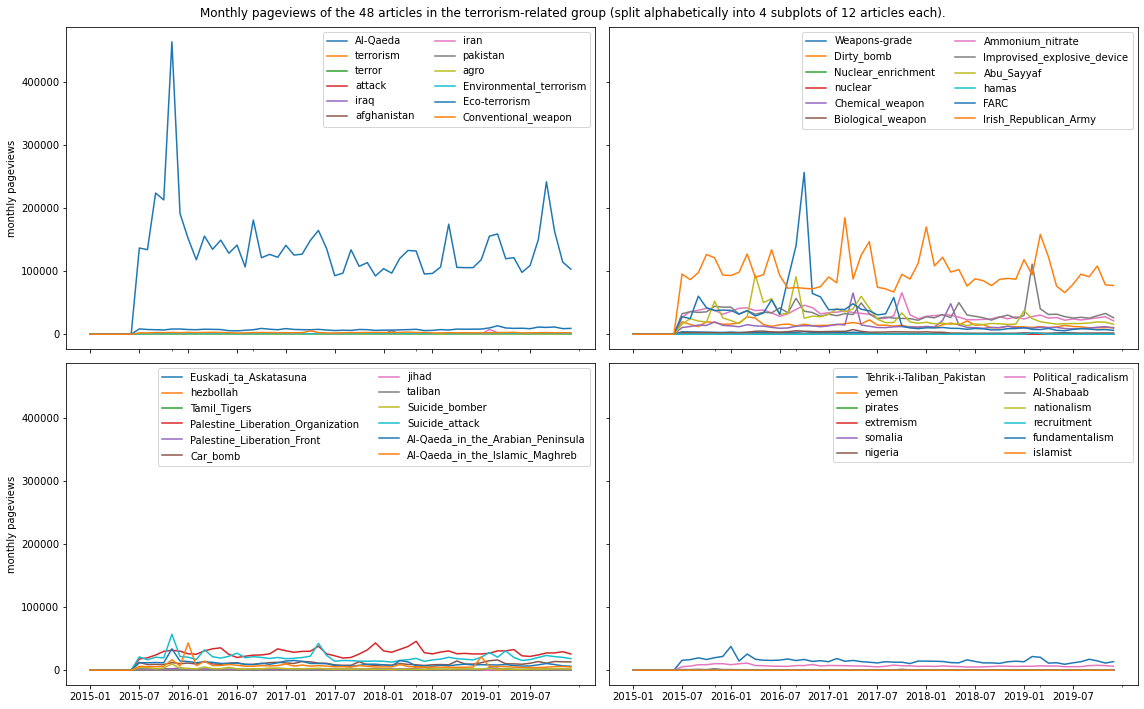

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(16, 10))

df.iloc[60:,  0: 12].plot(ax=axes[0, 0], xticks=(range(0, 60, 6)))
df.iloc[60:, 12: 24].plot(ax=axes[0, 1])
df.iloc[60:, 24: 36].plot(ax=axes[1, 0])
df.iloc[60:, 36: 48].plot(ax=axes[1, 1])

axes[0, 0].set_ylabel('monthly pageviews')
axes[1, 0].set_ylabel('monthly pageviews')

axes[0, 0].legend(ncol=2)
axes[1, 0].legend(ncol=2)
axes[0, 1].legend(ncol=2)
axes[1, 1].legend(ncol=2)

fig.suptitle('Monthly pageviews of the 48 articles in the terrorism-related group'
             ' (split alphabetically into 4 subplots of 12 articles each).')

fig.set_tight_layout(True);